# Challenge Básico: Introducción a PySpark y Koalas

PÉREZ ROSAS LUIS ALFREDO MCD UDG 2025-B GRUPO 2

### Introducción:
Este challenge introduce a los estudiantes a la visualización de grandes
bases de datos utilizando PySpark y Koalas, un API que facilita el trabajo
con grandes volúmenes de datos en un entorno de Spark pero con sintaxis
similar a pandas.

### Objetivo general:
Familiarizarse con PySpark y la API de Koalas para la manipulación y
visualización de datos a gran escala.

### Objetivo específico:
Descargar una base de datos desde Kaggle, importarla a Databricks, y
realizar un análisis exploratorio utilizando la API pyspark.pandas.

In [1]:
# 1. Importación de Bibliotecas

import findspark
findspark.init()

import pandas as pd
import pyspark

import pandas as pd
import numpy as np
import pyspark.pandas as ps
from pyspark.sql import SparkSession
import matplotlib as plt
import seaborn as sns



c:\Users\alfre\anaconda3\envs\ProcessBigData25B\lib\site-packages\pyspark\pandas\__init__.py:50: UserWarning: 'PYARROW_IGNORE_TIMEZONE' environment variable was not set. It is required to set this environment variable to '1' in both driver and executor sides if you use pyarrow>=2.0.0. pandas-on-Spark will set it for you but it does not work if there is a Spark context already launched.
  warnings.warn(


In [2]:
from pyspark.sql import SparkSession

spark = SparkSession.builder\
        .master("local[*]")\
        .appName('PySpark_Challenge1')\
        .getOrCreate()

### Base de datos:
Base de datos: Global Terrorism Database <br>
Plataforma: Kaggle<br>
Instrucciones: Los estudiantes deberán descargar los datos y cargarlos<br>
Apache Spark

In [3]:
gt = spark.read.csv('data/globalterrorismdb_0718dist.csv', 
                       inferSchema = True, 
                       header = True)


In [4]:
gt.show(15)

+------------+-----+------+----+----------+--------+----------+-------+------------------+------+--------------------+-----------+-------------+----------+-----------+-----------+--------+--------------------+--------------------+-----+-----+-----+---------+-----------+--------------------+--------+-------+-------+-----------+--------------------+-----------+---------------+-----------+---------------+---------+--------------------+------------+--------------------+--------------------+--------------------+-------+------------------+---------+-------------+------------+----------------+-----+-------+-------+-----------+---------+-------------+------------+----------------+-----+-------+-------+-----------+--------------------+--------+------+---------+------+---------+--------------------+-----------+-----------+-----------+----------+------+--------+-------+---------+-------------+------+----------+--------------+------+----------+--------------+---------+---------+-------------+-----

In [5]:
# Convertir a pandas-on-Spark DataFrame

df = gt.toPandas()

In [6]:
# Mostrar las primeras filas del DataFrame

df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,None,0,None,58,Dominican Republic,2,...,None,None,None,None,PGIS,0,0,0,0,None
1,197000000002,1970,0,0,None,0,None,130,Mexico,1,...,None,None,None,None,PGIS,0,1,1,1,None
2,197001000001,1970,1,0,None,0,None,160,Philippines,5,...,None,None,None,None,PGIS,-9,-9,1,1,None
3,197001000002,1970,1,0,None,0,None,78,Greece,8,...,None,None,None,None,PGIS,-9,-9,1,1,None
4,197001000003,1970,1,0,None,0,None,101,Japan,4,...,None,None,None,None,PGIS,-9,-9,1,1,None


In [7]:
# Obtener los nombres de las columnas como una lista

column_headers_list = df.columns.tolist()
print(column_headers_list)

['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended', 'resolution', 'country', 'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude', 'longitude', 'specificity', 'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3', 'doubtterr', 'alternative', 'alternative_txt', 'multiple', 'success', 'suicide', 'attacktype1', 'attacktype1_txt', 'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt', 'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2', 'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3', 'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2', 'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2', 'guncertain3', 'individual', 'nperps', 'nperpcap', 'claimed', 'claimmode', 'claimmode_txt', 'claim2', 'claimmode2', 'claim

###  Limpieza de Datos

In [8]:
# Conversión de Columnas Numéricas
# Convertimos la columna 'nkill' (y otras numéricas si es necesario) a tipo numérico, manejando posibles errores de conversión.

# Conversión de columnas a tipo numérico el prefijo "n" (nkill, nkillus, nkillter, nwound, nwoundus, nwoundte)

df['nkill'] = ps.to_numeric(df['nkill'], errors='coerce')
df['nkillus'] = ps.to_numeric(df['nkillus'], errors='coerce')
df['nkillter'] = ps.to_numeric(df['nkillter'], errors='coerce')
df['nwound'] = ps.to_numeric(df['nwound'], errors='coerce')
df['nwoundus'] = ps.to_numeric(df['nwoundus'], errors='coerce')
df['nwoundte'] = ps.to_numeric(df['nwoundte'], errors='coerce')


In [9]:
# Verificación de Valores Nulos
# Identificamos columnas con valores nulos y calculamos su porcentaje.

null_counts = df.isnull().sum()
null_percentage = (null_counts / df.shape[0]) * 100
nulls = ps.DataFrame({'nulos': null_counts, 'porcentaje': null_percentage})
nulls[nulls['nulos'] > 0]


,nulos,porcentaje
approxdate,172452,94.914993
resolution,179471,98.778145
provstate,421,0.231712
city,434,0.238867
latitude,4556,2.507554
longitude,4557,2.508104
specificity,6,0.003302
location,126196,69.456385
summary,66129,36.396409
doubtterr,1,0.000550


## 4. Análisis Estadístico Descriptivo
### 4.1 Estadísticas Generales

In [10]:
# Estadísticas Descriptivas
# Calculamos estadísticas descriptivas para entender la distribución de las variables numéricas.

df.describe()


,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,181691.000000,170617.000000,116769.000000,114452.000000,165251.000000,116898.000000,112508.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,0.068297,2.403823,0.053336,0.509497,3.152641,0.049556,0.117467
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,0.284553,11.554776,5.728405,4.196603,35.939637,3.145368,1.969353
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,-9.000000,-9.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,1.000000,1570.000000,1360.000000,500.000000,8191.000000,751.000000,405.000000


In [11]:

# Análisis estadístico descriptivo
print(df[['nkill', 'nkillus', 'nkillter', 'nwound', 'nwoundus', 'nwoundte']].describe())

               nkill        nkillus       nkillter         nwound  \
count  170617.000000  116769.000000  114452.000000  165251.000000   
mean        2.403823       0.053336       0.509497       3.152641   
std        11.554776       5.728405       4.196603      35.939637   
min        -9.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         2.000000       0.000000       0.000000       2.000000   
max      1570.000000    1360.000000     500.000000    8191.000000   

            nwoundus       nwoundte  
count  116898.000000  112508.000000  
mean        0.049556       0.117467  
std         3.145368       1.969353  
min         0.000000       0.000000  
25%         0.000000       0.000000  
50%         0.000000       0.000000  
75%         0.000000       0.000000  
max       751.000000     405.000000  


In [12]:
# Análisis de Correlación
# Calculamos la correlación entre variables numéricas para observar posibles relaciones.

correlation_matrix = df[['nkill', 'nwound']].corr()
print("Matriz de Correlación entre 'nkill' y 'nwound':\n", correlation_matrix)


Matriz de Correlación entre 'nkill' y 'nwound':
            nkill    nwound
nkill   1.000000  0.534501
nwound  0.534501  1.000000


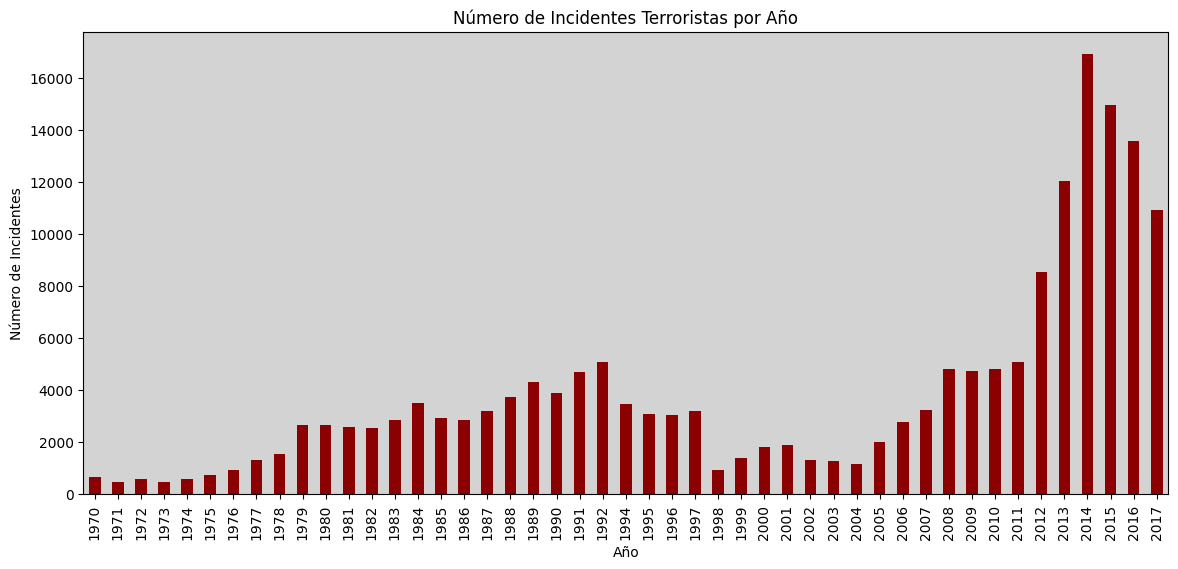

In [18]:
# Análisis Exploratorio de Datos (EDA)
# Incidentes por Año
# Graficamos la cantidad de incidentes terroristas reportados por año.

ax = df['iyear'].value_counts().sort_index().plot(kind='bar', figsize=(14, 6), color='darkred')
ax.set_xlabel("Año")
ax.set_ylabel("Número de Incidentes")
ax.set_title("Número de Incidentes Terroristas por Año")
ax.set_facecolor('lightgrey')


Text(0.5, 1.0, 'Top 10 Países con Mayor Número de Incidentes')

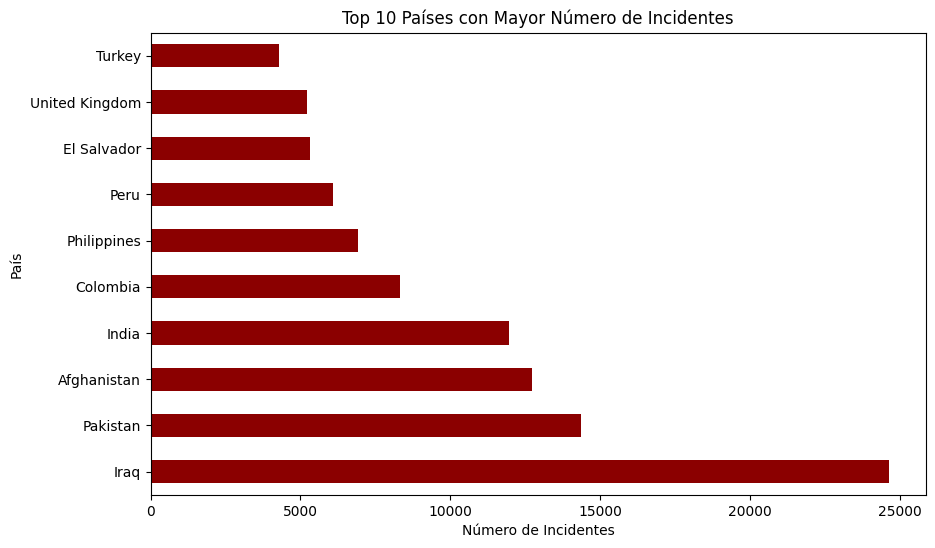

In [ ]:
# Países con Mayor Número de Incidentes
# Mostramos los 10 países con mayor número de incidentes.

ax = df['country_txt'].value_counts().head(10).plot(kind='barh', figsize=(10, 6), color='darkred')
ax.set_xlabel("Número de Incidentes")
ax.set_ylabel("País")
ax.set_title("Top 10 Países con Mayor Número de Incidentes")


Text(0.5, 1.0, 'Distribución de Tipos de Ataques')

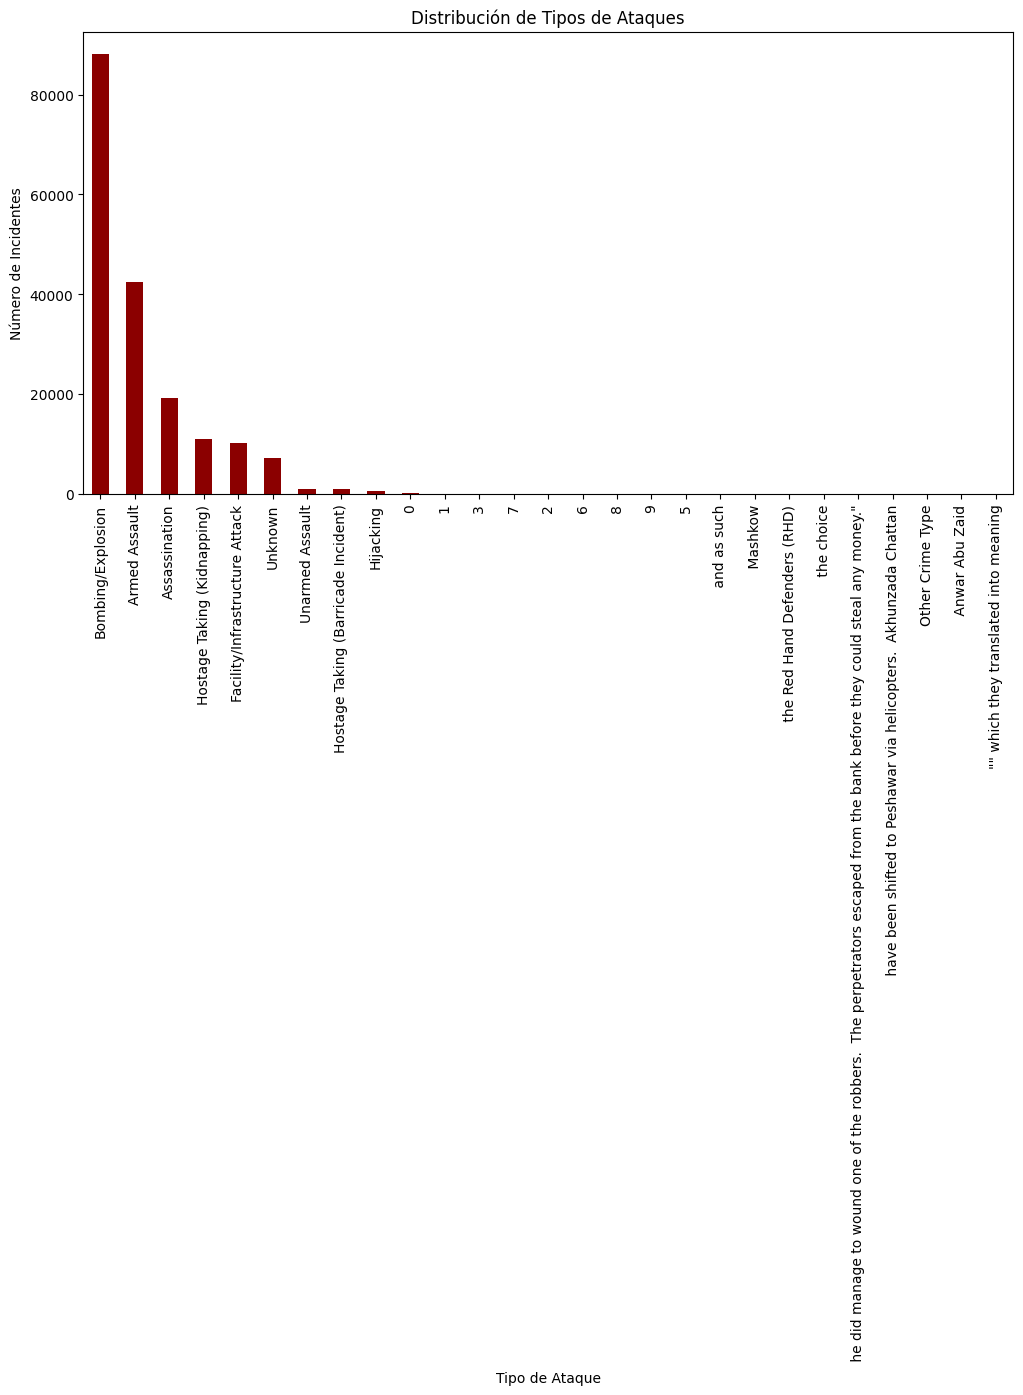

In [20]:
# Tipos de Ataques
# Analizamos la distribución de tipos de ataques.

ax = df['attacktype1_txt'].value_counts().plot(kind='bar', figsize=(12, 6), color='darkred')
ax.set_xlabel("Tipo de Ataque")
ax.set_ylabel("Número de Incidentes")
ax.set_title("Distribución de Tipos de Ataques")


Text(0.5, 1.0, 'Número de Muertes por Tipo de Ataque')

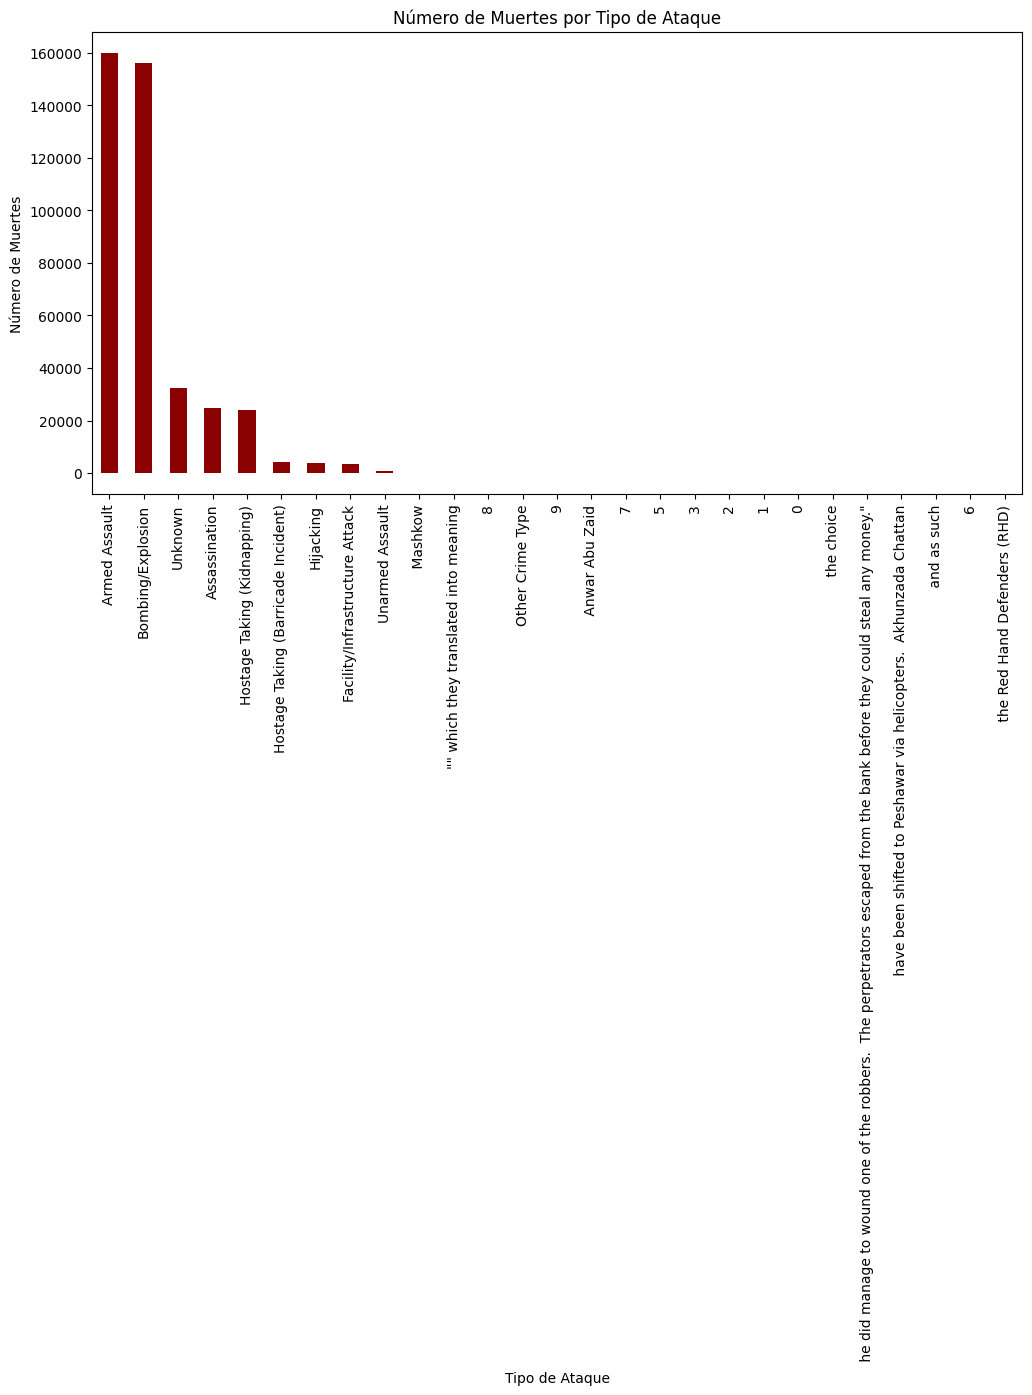

In [21]:
# Muertes por Tipo de Ataque
# Exploramos la cantidad total de muertes por cada tipo de ataque.

ax = df.groupby('attacktype1_txt')['nkill'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(12, 6), color='darkred')
ax.set_xlabel("Tipo de Ataque")
ax.set_ylabel("Número de Muertes")
ax.set_title("Número de Muertes por Tipo de Ataque")


Text(0.5, 1.0, 'Distribución de Incidentes por Región')

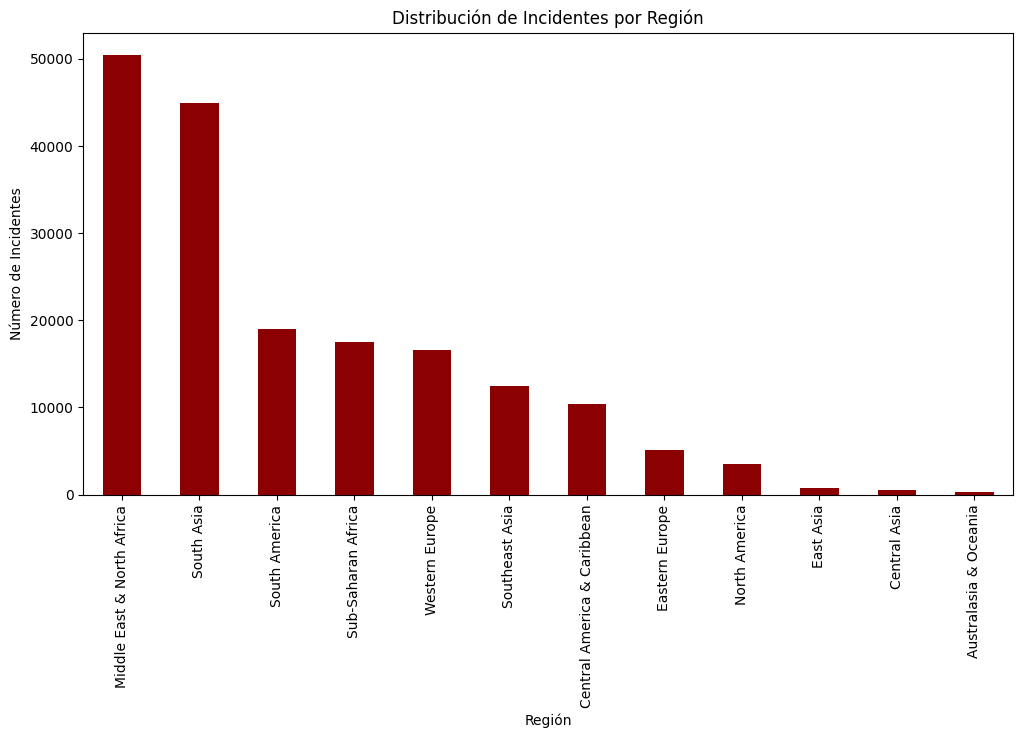

In [22]:
# Análisis Geográfico
# Incidentes por Región
# Observamos la cantidad de incidentes en cada región para detectar patrones geográficos.

ax = df['region_txt'].value_counts().plot(kind='bar', figsize=(12, 6), color='darkred')
ax.set_xlabel("Región")
ax.set_ylabel("Número de Incidentes")
ax.set_title("Distribución de Incidentes por Región")



In [23]:
# Parar la sesión de Spark
spark.stop()